![logo](banner.jpg)

<h1><center><span style="color:blue">TASCA 6 - IT Academy</span></center></h1>
<h2><center><span style="color:blue">Curs Data Science</span></center></h2>

In [65]:
import numpy as np
from numpy import random
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [66]:
file=pd.read_csv("DelayedFlightsNew.csv", sep=",", encoding='utf8')
file[:3]

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,V_Media,Con_retraso,Velocidad,TotalDelay,FlightCode
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,NaN,NaN,NaN,NaN,NaN,342.07,False,324.00,NaN,WN-335
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,NaN,NaN,NaN,NaN,NaN,342.07,True,335.17,NaN,WN-3231
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,NaN,NaN,NaN,NaN,NaN,342.07,True,343.33,NaN,WN-448


In [67]:
file.shape

(1936758, 30)

In [68]:
file.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'V_Media', 'Con_retraso', 'Velocidad', 'TotalDelay', 'FlightCode'],
      dtype='object')

In [69]:
type(file)

pandas.core.frame.DataFrame

In [70]:
file.shape

(1936758, 30)

In [71]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  CarrierDelay       float64
 21  WeatherDelay       float64
 22  NASDelay           float64
 23  SecurityDelay      float64
 24  LateAircraftDelay  float64
 25  V_Media           

### <span style="color:black">Exercici 1.</span>

__Resumeix gràficament el data set DelayedFlights.csv:__ <span style="color:blue">__[X] Fet__</span>

__Crea almenys una visualització per:__

__1. Una variable categòrica (UniqueCarrier)__

In [72]:
file['UniqueCarrier']

0          WN
1          WN
2          WN
3          WN
4          WN
           ..
1936753    DL
1936754    DL
1936755    DL
1936756    DL
1936757    DL
Name: UniqueCarrier, Length: 1936758, dtype: object

In [73]:
TopCompanies = file['UniqueCarrier'].value_counts()[:5]
TopCompanies.loc["Otros"]=951512
TopCompanies

WN       377602
AA       191865
MQ       141920
UA       141426
OO       132433
Otros    951512
Name: UniqueCarrier, dtype: int64

In [74]:
suma=sum(file['UniqueCarrier'].value_counts()[:5])
ratio=(suma/len(file.UniqueCarrier))*100
round(ratio, 2) #porcentaje que supone las 5 compañias que han realizado más vuelos vs. el resto

50.87

In [75]:
Otros = len(file.UniqueCarrier)-suma
Otros #número de vuelos realizados por el resto de compañías (sin incluir las 5 primeras)

951512

In [76]:
type(file.UniqueCarrier)

pandas.core.series.Series

c:\users\marta\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  


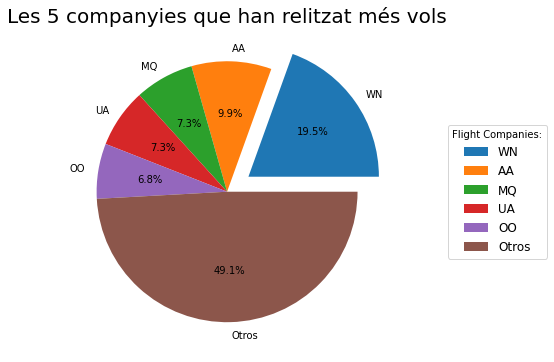

In [88]:
mylabels = ["WN", "AA", "MQ", "UA", "OO", "Otros"]
plt.title('Les 5 companyies que han relitzat més vols', fontsize=20)
plt.rcParams["figure.figsize"] = (10, 6)
myexplode = [0.2, 0, 0, 0, 0, 0]
fig=plt.pie(TopCompanies, autopct='%1.1f%%', labels=mylabels, explode= myexplode)
plt.legend(title = "Flight Companies:", fontsize= 12, loc = 'right', bbox_to_anchor = (1, 0, 0.5, 1))
plt.savefig("Var_Categ.png",dpi=200, bbox_inches='tight') #guardamos el gráfico en formato png (ejercicio 2)
plt.show()

# De 5 companyies que han realitzat més trajectes (que suposa el 50,87% del total de vols), la que ha realitzat més vols
# és WN, seguida de AA, MQ, UA i OO.

__2. Una variable numèrica (ArrDelay)__

In [89]:
Retard=pd.DataFrame(file, columns=["ArrDelay","FlightCode"]).copy()
Retard_ok=Retard.dropna()
data=Retard_ok.sort_values('ArrDelay', ascending=False)[:10]

In [90]:
y=data['ArrDelay']
x=data['FlightCode']

c:\users\marta\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  


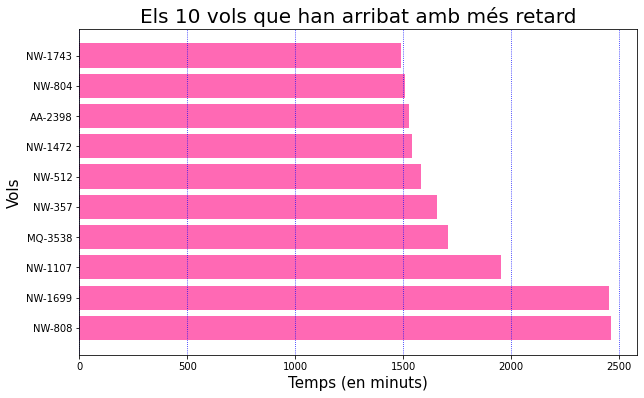

In [91]:
plt.rcParams["figure.figsize"] = (10, 6)
plt.barh(x, y, color = "hotpink")
plt.grid(axis='x',linestyle='dotted', color='b')
plt.title('Els 10 vols que han arribat amb més retard', fontsize=20)
plt.ylabel('Vols', fontsize=15)
plt.xlabel('Temps (en minuts)',fontsize=15)
plt.savefig("Var_Num.png",dpi=400, bbox_inches='tight') #guardamos el gráfico en formato png (ejercicio 2)
plt.show()

# Al següent gràfic observem que el vol que ha arribat més tard és el NW808, seguit del NW1699 y NW1107. De los 10 vuelos con 
# más retraso representados en le gráfico, 8 son de la compañía NW. 

__3. Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)__

In [92]:
df=pd.DataFrame(file, columns=["ArrDelay","UniqueCarrier"]).copy()
df2=df.dropna()
df2[:5]

,ArrDelay,UniqueCarrier
0,-14.0,WN
1,2.0,WN
2,14.0,WN
3,34.0,WN
4,11.0,WN


In [93]:
df3=df2.groupby('UniqueCarrier').aggregate(sum)
df4=df3.sort_values('ArrDelay', ascending=False)
df4['index'] = df4.index
df4

,ArrDelay,index
UniqueCarrier,,
WN,11319092.0,WN
AA,8889066.0,AA
UA,6733013.0,UA
MQ,6396704.0,MQ
OO,5978936.0,OO
XE,5176042.0,XE
DL,4535644.0,DL
CO,4045932.0,CO
EV,3888131.0,EV


In [94]:
y=df4['ArrDelay']
x=df4['index']

c:\users\marta\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  


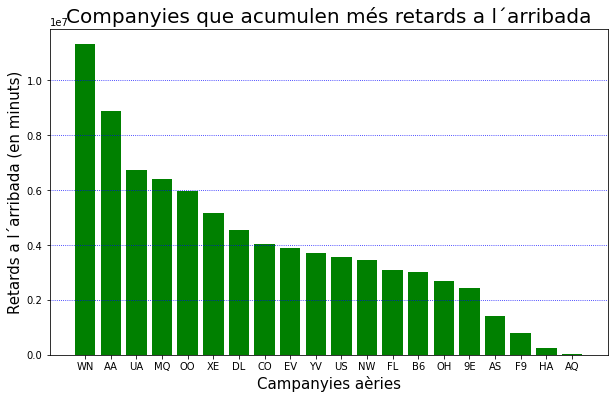

In [95]:
plt.rcParams["figure.figsize"] = (10, 6)
plt.bar(x, y, color = "green")
plt.grid(axis='y',linestyle='dotted', color='b')
plt.title('Companyies que acumulen més retards a l´arribada', fontsize=20)
plt.ylabel('Retards a l´arribada (en minuts)', fontsize=15)
plt.xlabel('Campanyies aèries',fontsize=15)
plt.savefig("Var_Num+Categ.png",dpi=400, bbox_inches='tight') #guardamos el gráfico en formato png (ejercicio 2)
plt.show()

# Cómo ya me imaginaba por el gráfico anterior, la compañía aérea que acumula más retrasos es la NW.

__4. Dues variables numèriques (ArrDelay i DepDelay)__

In [96]:
DF=pd.DataFrame(file, columns=["ArrDelay","DepDelay"]).copy()
DF.head()

,ArrDelay,DepDelay
0,-14.0,8.0
1,2.0,19.0
2,14.0,8.0
3,34.0,34.0
4,11.0,25.0


In [97]:
DF.corr() #La correlació entre sortir tard i arribar tard és casi directa

,ArrDelay,DepDelay
ArrDelay,1.000000,0.952927
DepDelay,0.952927,1.000000


In [98]:
y=DF['ArrDelay']
x=DF['DepDelay']

c:\users\marta\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  


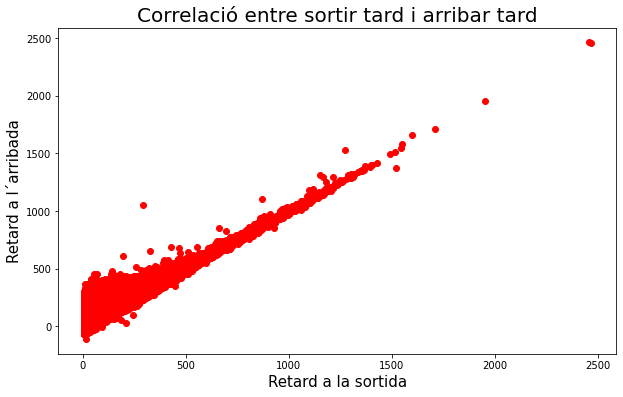

In [99]:
plt.plot(x,y, 'ro')
plt.ylabel('Retard a l´arribada', fontsize=15)
plt.xlabel('Retard a la sortida', fontsize=15)
plt.title('Correlació entre sortir tard i arribar tard', fontsize=20)
plt.savefig("2_VarNum",dpi=400, bbox_inches='tight') #guardamos el gráfico en formato png (ejercicio 2)
plt.show()

# Existe una clara relación lineal entre ambas variables, de manera que cuanto mayor es el retraso en la salida, 
# más probabilidades tendrán las compañías aéreas de llegar tarde en destido.

__5. Tres variables (ArrDelay, DepDelay i UniqueCarrier)__

c:\users\marta\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


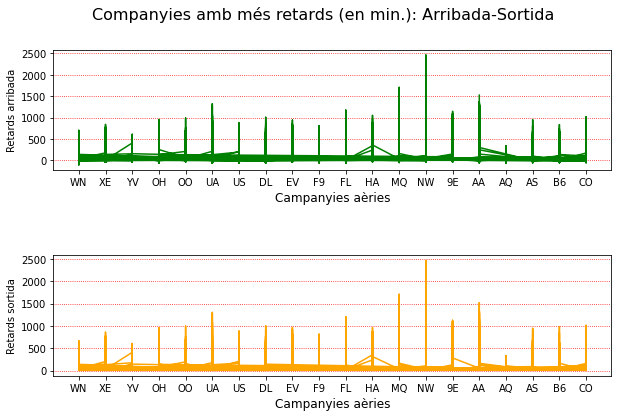

In [100]:
x = np.array(file['UniqueCarrier'])
y = np.array(file['ArrDelay'])

plt.subplot(2, 1, 1)
plt.plot(x,y, color='green')
plt.grid(axis='y',linestyle='dotted', color='red')
plt.ylabel('Retards arribada', fontsize=10)
plt.xlabel('Campanyies aèries',fontsize=12)

#plot 2:
z = np.array(file['UniqueCarrier'])
i = np.array(file['DepDelay'])

plt.subplot(2, 1, 2)
plt.plot(z, i, color='orange')
plt.grid(axis='y',linestyle='dotted', color='red')
plt.ylabel('Retards sortida', fontsize=10)
plt.xlabel('Campanyies aèries',fontsize=12)

plt.suptitle('Companyies amb més retards (en min.): Arribada-Sortida', fontsize=16)
plt.subplots_adjust(wspace=0.5, 
                    hspace=0.7)
plt.savefig("3_Var.png",dpi=400, bbox_inches='tight') #guardamos el gráfico en formato png (ejercicio 2)
plt.show()

# Comparando ambos subplots, observamos que casi la totalidad de los restrasos en la llegada, así como el número de minutos 
# retrasados, se corresponden a los retrasos generados en la salida. Vemos que ambos gráficos son casi idénticos. 

__6. Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier).__

In [102]:
variables4=pd.DataFrame(file, columns=["UniqueCarrier",'AirTime',"ArrDelay", "DepDelay"])
variables4.head()

,UniqueCarrier,AirTime,ArrDelay,DepDelay
0,WN,116.0,-14.0,8.0
1,WN,113.0,2.0,19.0
2,WN,76.0,14.0,8.0
3,WN,77.0,34.0,34.0
4,WN,87.0,11.0,25.0


c:\users\marta\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


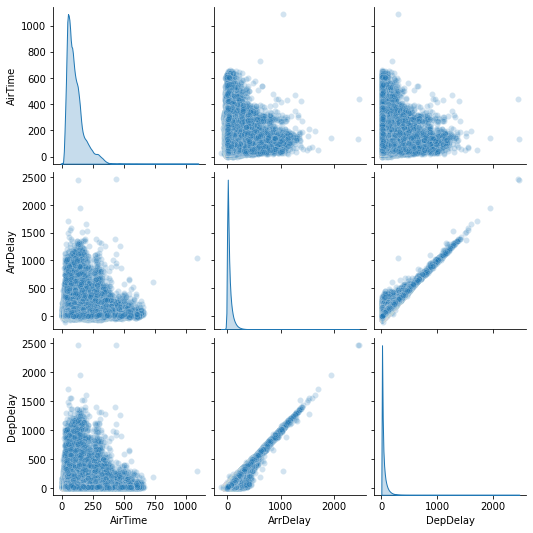

In [103]:
sns.pairplot(variables4, diag_kind='kde', plot_kws={'alpha': 0.2})
plt.savefig("4_Var.png",dpi=400, bbox_inches='tight') #guardamos el gráfico en formato png (ejercicio 2)
plt.show()
# La matriz scatter_matrix es un buen recurso para representar multivariables de un dataset en un gráfico y observar 
# la relación entre ellas. Por ejemplo, en el siguiente gráfico observamos que existe una relación lineal en los vuelos que 
# han salido con retraso y los que han llegado con retraso. También observamos que no existe una correlación entre la duración 
# del vuelo (en minutos) y el retraso del mismo (tanto en llegada como en salida).

### <span style="color:black">Exercici 2.</span>

__Exporta els gràfics com imatges o com html:__</span><span style="color:blue"> __[X] Fet__</span> (ver ejercicio anterior)

### <span style="color:black">Exercici 3.</span>

__Integra les visualitzacions gràfiques, en la tasca 5, del Sprint 3.:__</span><span style="color:blue"> __[X] Fet__</span> 